# Compare Country Trajectories - Total Cases
> Comparing how countries trajectories of total cases are similar with Italy, South Korea and Japan

- comments: true
- author: Pratap Vardhan
- categories: [growth, compare, interactive]
- image: images/covid-compare-country-trajectories.png
- permalink: /compare-country-trajectories/

In [1]:
#hide
import pandas as pd
import altair as alt
import math
import numpy as np
from IPython.display import HTML
alt.data_transformers.disable_max_rows()

CHART_WIDTH = 600
CHART_HEIGHT = 450

In [2]:
#hide
url = ('https://github.com/dssg-pt/covid19pt-data/raw/master/data_concelhos.csv')
df = pd.read_csv(url, index_col='data')

In [3]:
df = df.fillna(0)
#df['data'] = pd.to_datetime(df['data'], format='%d-%m-%y')
df_cols = df.columns

In [4]:
#pd.DataFrame(df_cols).to_csv('county.csv')

In [5]:
df.dtypes

ABRANTES              float64
AGUIAR DA BEIRA       float64
ALANDROAL             float64
ALBERGARIA-A-VELHA    float64
ALBUFEIRA             float64
                       ...   
VOUZELA               float64
ÁGUEDA                float64
ÉVORA                 float64
ÍLHAVO                float64
ÓBIDOS                float64
Length: 308, dtype: object

In [6]:
#df = df.T
df = df.reset_index()

In [7]:
dff = df.copy()

In [8]:
#hide

dff = (df.groupby('data')[df_cols].sum()
       .stack().reset_index(name='Confirmed Cases')
       .rename(columns={'level_1': 'county', 'data': 'Date'}))
dff['Date'] = pd.to_datetime(dff['Date'],  format='%d-%m-%Y')


In [9]:
dff = dff.sort_values(by='Date', ascending=True)
dff = dff.reset_index()
del dff['index']
dff

,Date,county,Confirmed Cases
0,2020-03-24,SANTANA,0.0
1,2020-03-24,POVOAÇÃO,0.0
2,2020-03-24,PORTO SANTO,0.0
3,2020-03-24,PORTO MONIZ,0.0
4,2020-03-24,PORTO DE MÓS,0.0
...,...,...,...
32335,2020-07-06,FUNCHAL,26.0
32336,2020-07-06,FRONTEIRA,0.0
32337,2020-07-06,FREIXO DE ESPADA À CINTA,3.0
32338,2020-07-06,GOUVEIA,23.0


In [10]:
a = dff[dff['county']=='SANTA MARIA DA FEIRA']
a.tail(20)

,Date,county,Confirmed Cases
26200,2020-06-17,SANTA MARIA DA FEIRA,497.0
26510,2020-06-18,SANTA MARIA DA FEIRA,497.0
26820,2020-06-19,SANTA MARIA DA FEIRA,497.0
27401,2020-06-20,SANTA MARIA DA FEIRA,497.0
27433,2020-06-21,SANTA MARIA DA FEIRA,497.0
28006,2020-06-22,SANTA MARIA DA FEIRA,498.0
28049,2020-06-23,SANTA MARIA DA FEIRA,498.0
28358,2020-06-24,SANTA MARIA DA FEIRA,498.0
28932,2020-06-25,SANTA MARIA DA FEIRA,498.0
28973,2020-06-26,SANTA MARIA DA FEIRA,498.0


In [11]:
#hide
MIN_CASES = 300
LAST_DATE = dff.iloc[-1]['Date']
'''
# sometimes last column may be empty, then go backwards
for c in dt_cols[::-1]:
    if not df[c].fillna(0).eq(0).all():
        LAST_DATE = c
        break
'''
countries = dff[dff['Confirmed Cases'].ge(MIN_CASES)].sort_values(by='Confirmed Cases', ascending=False)
countries = countries['county'].values

In [12]:
#hide
SINCE_CASES_NUM = 100
dff2 = dff[dff['county'].isin(countries)].copy()
days_since = (dff2.assign(F=dff2['Confirmed Cases'].ge(SINCE_CASES_NUM))
              .set_index('Date')
              .groupby('county')['F'].transform('idxmax'))
dff2['Days since 100 cases'] = (dff2['Date'] - days_since.values).dt.days.values
dff2 = dff2[dff2['Days since 100 cases'].ge(0)]

In [13]:
np.unique(countries)

array(['ALMADA', 'AMADORA', 'AVEIRO', 'BARCELOS', 'BARREIRO', 'BRAGA',
       'CASCAIS', 'COIMBRA', 'FELGUEIRAS', 'GONDOMAR', 'GUIMARÃES',
       'LISBOA', 'LOURES', 'LOUSADA', 'MAIA', 'MATOSINHOS', 'MOITA',
       'ODIVELAS', 'OEIRAS', 'OVAR', 'PAREDES', 'PAÇOS DE FERREIRA',
       'PORTO', 'SANTA MARIA DA FEIRA', 'SANTO TIRSO', 'SEIXAL', 'SINTRA',
       'VALONGO', 'VILA DO CONDE', 'VILA FRANCA DE XIRA',
       'VILA NOVA DE FAMALICÃO', 'VILA NOVA DE GAIA'], dtype=object)

In [14]:
#hide
def get_country_colors(x):
    mapping = {
        'ALMADA': 'black',
        'AMADORA': '#A1BA59',
        'AVEIRO': '#C71585',
        'BARCELOS': 'green',
        'BRAGA': '#4DC6BD',
        'CASCAIS': 'purple',
        'COIMBRA': '#0059B3',
        'FELGUEIRAS': '#ff0000',
        'GONDOMAR': '#C1B7AD',
        'GUIMARÃES': '#2495D3',
        'LISBOA': 'orange',
        'LOURES': '#FFCD00',
        'LOUSADA': '#6f0000',
        'MAIA': '#C60C30',
        'MATOSINHOS': '#ED2939',
        'ODIVELAS': '#006600',
        'OEIRAS': '#FF4500',
        'OVAR': '#FF6666',
        'PAREDES': '#990000',
        'PAÇOS DE FERREIRA': '#7499c7',
        'PORTO': 'mediumseagreen',
        'SANTA MARIA DA FEIRA': 'grey',
        'SANTO TIRSO': '#9467bd',
        'SEIXAL': '#9467bd',
        'SINTRA': '#9467bd',
        'VALONGO': '#9467bd',
        'VILA FRANCA DE XIRA': '#9467bd',
        'SINTRA': '#9467bd',
        'VILA NOVA DE FAMALICÃO': '#9467bd',
        'VILA NOVA DE GAIA': '#9467bd'}
    return mapping.get(x, '#C1B7AD')

In [15]:
#hide_input
baseline_countries = ['LISBOA', 'PORTO', 'SANTA MARIA DA FEIRA']
max_date = dff2['Date'].max()
color_domain = list(dff2['county'].unique())
color_range = list(map(get_country_colors, color_domain))
y_domain_max = pow(10, math.ceil(math.log10(dff['Confirmed Cases'].max())))
ref_max_day = math.ceil(math.log(y_domain_max / SINCE_CASES_NUM, 1.33))

def make_since_chart(highlight_countries=[], baseline_countries=baseline_countries):
    selection = alt.selection_multi(fields=['county'], bind='legend', 
                                    init=[{'county': x} for x in highlight_countries + baseline_countries])

    base = alt.Chart(dff2, width=CHART_WIDTH, height=CHART_HEIGHT).encode(
        x='Days since 100 cases:Q',
        y=alt.Y('Confirmed Cases:Q', scale=alt.Scale(type='log')),
        color=alt.Color(
            'county:N',
            scale=alt.Scale(domain=color_domain, range=color_range),
            legend=alt.Legend(columns=math.ceil(len(color_domain)/28), symbolLimit=len(color_domain))),
        tooltip=list(dff2),
        opacity=alt.condition(selection, alt.value(1), alt.value(0.05))
    )
    max_day = dff2['Days since 100 cases'].max()
    ref = pd.DataFrame([[x, 100*1.33**x] for x in range(ref_max_day)], columns=['Days since 100 cases', 'Confirmed Cases'])
    base_ref = alt.Chart(ref).encode(x='Days since 100 cases:Q', y='Confirmed Cases:Q')
    return (
        base_ref.mark_line(color='black', opacity=.5, strokeDash=[3,3]) +
        base_ref.transform_filter(
            alt.datum['Days since 100 cases'] >= ref_max_day - 1
        ).mark_text(dx=-30, dy=30, align='right', fontSize=10, text='33% Daily Growth') +
        base.mark_line(point=True).add_selection(selection) + 
        base.transform_filter(
            alt.datum['Date'] >= int(max_date.timestamp() * 1000)
        ).mark_text(dy=-8, align='right', fontWeight='bold').encode(text='Country:N')
    ).properties(
        title=f"Compare {', '.join(highlight_countries)} trajectory with {', '.join(baseline_countries)}"
    )

## Learning from Italy, South Korea & Japan

Italy, South Korea & Japan are three countries which show different growth rates and how it evolved over time. 

**South Korea** flattened it's growth after 2 weeks since 100 cases. **Italy** continue to grew after 3rd week.

Where does your Country stand today?

<small>Click (Shift+ for multiple) on Countries legend to filter the visualization.</small>

In [16]:
#hide_input
HTML(f'<small class="float-right">Last Updated on {pd.to_datetime(LAST_DATE).strftime("%B, %d %Y")}</small>')

In [17]:
#hide_input
chart = make_since_chart()
chart

alt.LayerChart(...)

In [18]:
#hide_input
chart2 = make_since_chart(['MAIA', 'MATOSINHOS'])
chart2

alt.LayerChart(...)

In [19]:
#hide_input
chart3 = make_since_chart(['SINTRA', 'CASCAIS'])
chart3

alt.LayerChart(...)

In [20]:
#hide_input
chart4 = make_since_chart(['BRAGA', 'COIMBRA'])
chart4

alt.LayerChart(...)

In [21]:
#hide_input
chart5 = make_since_chart(['SEIXAL', 'LOURES','ODIVELAS','ALMADA','OEIRAS','AMADORA','BARREIRO'])
chart5

alt.LayerChart(...)

In [22]:
df = pd.read_csv("https://github.com/dssg-pt/covid19pt-data/raw/master/data.csv")

In [23]:
# Data preprocessing
# Exclude states with 2 or less datapoints with 10 or less cases
col = ['data_dados','confirmados_estrangeiro', 'confirmados',
       'confirmados_novos', 'recuperados', 'obitos', 'internados',
       'internados_uci', 'lab', 'suspeitos', 'vigilancia', 'n_confirmados',
       'cadeias_transmissao', 'transmissao_importada', 'confirmados_0_9_f',
       'confirmados_0_9_m', 'confirmados_10_19_f', 'confirmados_10_19_m',
       'confirmados_20_29_f', 'confirmados_20_29_m', 'confirmados_30_39_f',
       'confirmados_30_39_m', 'confirmados_40_49_f', 'confirmados_40_49_m',
       'confirmados_50_59_f', 'confirmados_50_59_m', 'confirmados_60_69_f',
       'confirmados_60_69_m', 'confirmados_70_79_f', 'confirmados_70_79_m',
       'confirmados_80_plus_f', 'confirmados_80_plus_m', 'sintomas_tosse',
       'sintomas_febre', 'sintomas_dificuldade_respiratoria',
       'sintomas_cefaleia', 'sintomas_dores_musculares',
       'sintomas_fraqueza_generalizada', 'confirmados_f', 'confirmados_m',
       'obitos_arsnorte', 'obitos_arscentro', 'obitos_arslvt',
       'obitos_arsalentejo', 'obitos_arsalgarve', 'obitos_acores',
       'obitos_madeira', 'obitos_estrangeiro', 'recuperados_arsnorte',
       'recuperados_arscentro', 'recuperados_arslvt',
       'recuperados_arsalentejo', 'recuperados_arsalgarve',
       'recuperados_acores', 'recuperados_madeira', 'recuperados_estrangeiro',
       'obitos_0_9_f', 'obitos_0_9_m', 'obitos_10_19_f', 'obitos_10_19_m',
       'obitos_20_29_f', 'obitos_20_29_m', 'obitos_30_39_f', 'obitos_30_39_m',
       'obitos_40_49_f', 'obitos_40_49_m', 'obitos_50_59_f', 'obitos_50_59_m',
       'obitos_60_69_f', 'obitos_60_69_m', 'obitos_70_79_f', 'obitos_70_79_m',
       'obitos_80_plus_f', 'obitos_80_plus_m', 'obitos_f', 'obitos_m','confirmados_desconhecidos_m', 'confirmados_desconhecidos_f']

for col_1 in col:
    df = df.drop(columns=[col_1], axis=1)
    
df.rename(columns={'data':'date','confirmados_arsnorte': 'ARS North', 'confirmados_madeira': 'RA Madeira',
       'confirmados_arscentro': 'ARS Center', 'confirmados_acores': 'RA Acores','confirmados_arslvt': 'ARS Lisbon and Tejo Vale',
       'confirmados_arsalentejo': 'ARS Alentejo', 'confirmados_arsalgarve':'ARS Algarve',}, inplace=True)

In [24]:
df = df.fillna(0)
#df['data'] = pd.to_datetime(df['data'], format='%d-%m-%y')
df_cols = df.columns

In [25]:
#df = df.T
df = df.reset_index()

In [26]:
dff = df.copy()

In [27]:
#hide

dff = (df.groupby('date')[df_cols].sum()
       .stack().reset_index(name='Confirmed Cases')
       .rename(columns={'level_1': 'county', 'date': 'Date'}))
dff['Date'] = pd.to_datetime(dff['Date'],  format='%d-%m-%Y')

In [28]:
dff = dff.sort_values(by='Date', ascending=True)
dff = dff.reset_index()
del dff['index']
dff

,Date,county,Confirmed Cases
0,2020-02-26,ARS Algarve,0
1,2020-02-26,ARS North,0
2,2020-02-26,ARS Center,0
3,2020-02-26,ARS Lisbon and Tejo Vale,0
4,2020-02-26,ARS Alentejo,0
...,...,...,...
961,2020-07-12,ARS Algarve,704
962,2020-07-12,RA Acores,152
963,2020-07-12,RA Madeira,97
964,2020-07-12,ARS North,18109


In [29]:
#hide
MIN_CASES = 100
LAST_DATE = dff.iloc[-1]['Date']
'''
# sometimes last column may be empty, then go backwards
for c in dt_cols[::-1]:
    if not df[c].fillna(0).eq(0).all():
        LAST_DATE = c
        break
'''
countries = dff[dff['Confirmed Cases'].ge(MIN_CASES)].sort_values(by='Confirmed Cases', ascending=False)
countries = countries['county'].values

In [30]:
#hide
SINCE_CASES_NUM = 100
dff2 = dff[dff['county'].isin(countries)].copy()
days_since = (dff2.assign(F=dff2['Confirmed Cases'].ge(SINCE_CASES_NUM))
              .set_index('Date')
              .groupby('county')['F'].transform('idxmax'))
dff2['Days since 100 cases'] = (dff2['Date'] - days_since.values).dt.days.values
dff2 = dff2[dff2['Days since 100 cases'].ge(0)]

In [31]:
np.unique(countries)

array(['ARS Alentejo', 'ARS Algarve', 'ARS Center',
       'ARS Lisbon and Tejo Vale', 'ARS North', 'RA Acores'], dtype=object)

In [32]:
#hide
def get_country_colors(x):
    mapping = {
        'ARS Alentejo': 'black',
        'ARS Algarve': '#A1BA59',
        'ARS Center': '#C71585',
        'ARS Lisbon and Tejo Vale': 'green',
        'ARS North': '#4DC6BD',
        'RA Acores': 'purple',
        'RA Madeira': '#0059B3'
        }
    return mapping.get(x, '#C1B7AD')

In [33]:
#hide_input
baseline_countries = ['ARS North', 'ARS Lisbon and Tejo Vale', 'ARS Center']
max_date = dff2['Date'].max()
color_domain = list(dff2['county'].unique())
color_range = list(map(get_country_colors, color_domain))
y_domain_max = pow(10, math.ceil(math.log10(dff['Confirmed Cases'].max())))
ref_max_day = math.ceil(math.log(y_domain_max / SINCE_CASES_NUM, 1.33))

def make_since_chart(highlight_countries=[], baseline_countries=baseline_countries):
    selection = alt.selection_multi(fields=['county'], bind='legend', 
                                    init=[{'county': x} for x in highlight_countries + baseline_countries])

    base = alt.Chart(dff2, width=CHART_WIDTH, height=CHART_HEIGHT).encode(
        x='Days since 100 cases:Q',
        y=alt.Y('Confirmed Cases:Q', scale=alt.Scale(type='log')),
        color=alt.Color(
            'county:N',
            scale=alt.Scale(domain=color_domain, range=color_range),
            legend=alt.Legend(columns=math.ceil(len(color_domain)/28), symbolLimit=len(color_domain))),
        tooltip=list(dff2),
        opacity=alt.condition(selection, alt.value(1), alt.value(0.05))
    )
    max_day = dff2['Days since 100 cases'].max()
    ref = pd.DataFrame([[x, 100*1.33**x] for x in range(ref_max_day)], columns=['Days since 100 cases', 'Confirmed Cases'])
    base_ref = alt.Chart(ref).encode(x='Days since 100 cases:Q', y='Confirmed Cases:Q')
    return (
        base_ref.mark_line(color='black', opacity=.5, strokeDash=[3,3]) +
        base_ref.transform_filter(
            alt.datum['Days since 100 cases'] >= ref_max_day - 1
        ).mark_text(dx=-30, dy=30, align='right', fontSize=10, text='33% Daily Growth') +
        base.mark_line(point=True).add_selection(selection) + 
        base.transform_filter(
            alt.datum['Date'] >= int(max_date.timestamp() * 1000)
        ).mark_text(dy=-8, align='right', fontWeight='bold').encode(text='Country:N')
    ).properties(
        title=f"Compare {', '.join(highlight_countries)} trajectory with {', '.join(baseline_countries)}"
    )

In [34]:
#hide_input
HTML(f'<small class="float-right">Last Updated on {pd.to_datetime(LAST_DATE).strftime("%B, %d %Y")}</small>')

In [35]:
#hide_input
chart = make_since_chart()
chart

alt.LayerChart(...)

In [36]:
#hide_input
chart4 = make_since_chart(['ARS Alentejo', 'ARS Algarve', 'RA Acores'])
chart4

alt.LayerChart(...)

In [37]:
dff

,Date,county,Confirmed Cases
0,2020-02-26,ARS Algarve,0
1,2020-02-26,ARS North,0
2,2020-02-26,ARS Center,0
3,2020-02-26,ARS Lisbon and Tejo Vale,0
4,2020-02-26,ARS Alentejo,0
...,...,...,...
961,2020-07-12,ARS Algarve,704
962,2020-07-12,RA Acores,152
963,2020-07-12,RA Madeira,97
964,2020-07-12,ARS North,18109


In [38]:
#hide
SINCE_CASES_NUM = 0
dff2 = dff[dff['county'].isin(countries)].copy()
days_since = (dff2.assign(F=dff2['Confirmed Cases'].ge(SINCE_CASES_NUM))
              .set_index('Date')
              .groupby('county')['F'].transform('idxmax'))
dff2['Days since 100 cases'] = (dff2['Date'] - days_since.values).dt.days.values
dff2 = dff2[dff2['Days since 100 cases'].ge(0)]

In [39]:
dff2

,Date,county,Confirmed Cases,Days since 100 cases
0,2020-02-26,ARS Algarve,0,0
1,2020-02-26,ARS North,0,0
2,2020-02-26,ARS Center,0,0
3,2020-02-26,ARS Lisbon and Tejo Vale,0,0
4,2020-02-26,ARS Alentejo,0,0
...,...,...,...,...
960,2020-07-12,ARS Alentejo,572,137
961,2020-07-12,ARS Algarve,704,137
962,2020-07-12,RA Acores,152,137
964,2020-07-12,ARS North,18109,137


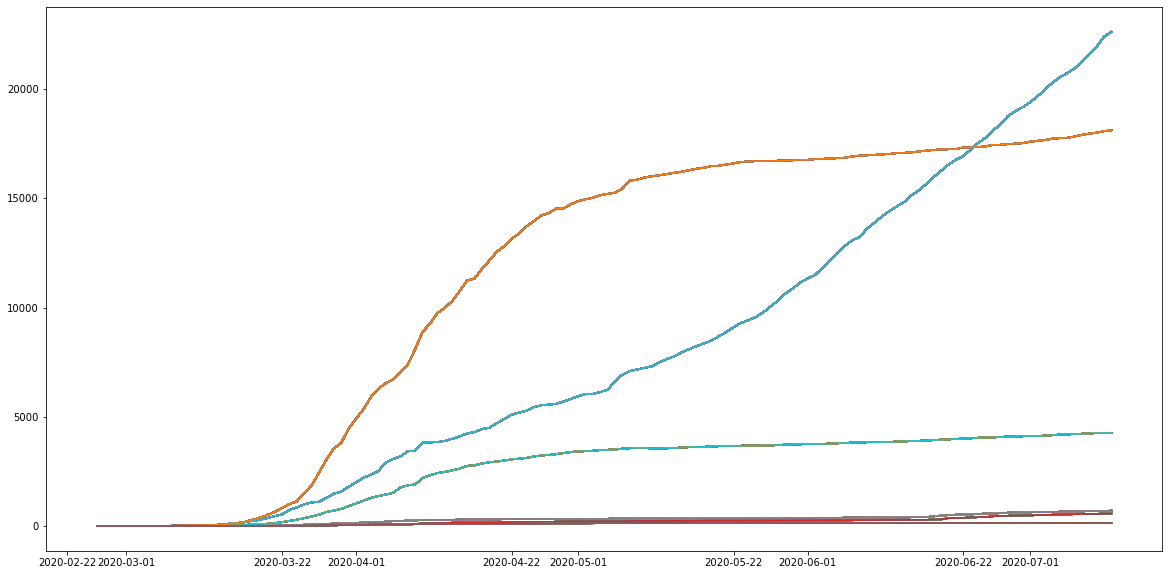

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for con in countries:
    df_prov = dff[dff['county'] == con]
    #df_prov = dff[dff['Confirmed Cases'] > 0]
    plt.plot(df_prov['Date'],df_prov['Confirmed Cases'])
    
plt.show()